# "Ising Model"

The objective for this project is to find the energy of a square $20\times20$ lattice from dipole moments. This is done by calculating the probablity that each of the grid spaces of the lattice have a certain "level" of energy. In this instance, we will be looking at the Ising model, which put the energy in the context of magnetic moments.

This particular project has an advanced background in physics so it is best to start out with some explanation.

The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment - it becomes magnetized.  The Ising model is a model of this process in which the individual moments are represented by dipoles or "spins" arranged on a grid or lattice

The spins themselves, in this simple model, are restricted to point in only two directions, up and down. Mathematically the spins are represented by variables $s_i=\pm1$ on the points of the lattice, $+1$ for up-pointing
spins and $-1$ for down-pointing ones.  Dipoles in real magnets can typically point in any spatial direction, not just up or down, but the Ising model, with its restriction to just the two directions, captures a lot of the important physics while being significantly simpler to understand.

Another important feature of many magnetic materials is that the individual dipoles in the material may interact magnetically in such a way that it is energetically favorable for them to line up in the same direction.  The
magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_is_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_is_j$, where $J$ is a positive interaction constant, which we will set equal to 1 for simplicity. The minus sign ensures that the interactions are *ferromagnetic*, meaning the energy is lower when dipoles are lined up.  A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to


$$E = -\sum_{<ij>} s_i s_j\,,$$


where the notation $<ij>$ indicates a sum over **unique** pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts. You'll notice that spins at the edges of the lattice have less than four neighbors. A convenient way to handle this issue is to the make the lattice be **periodic**. That is, treat the leftmost spins as adjacent to the rightmost spins, and the topmost adjacent to the bottommost. This approach is a way to approximate the effect of spins that are outside of the lattice.

The first step is to create a function that can take a 2-D array of spins and calculate the total energy of the system from this. For a given array of values, the function will add upp the "contributions" $-s_1 s_2$ for all of them and multiply by  $-1$. 

Imports needed for this project:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import scipy.fftpack as fftpack
import math
import random
from matplotlib.animation import FuncAnimation

In [3]:
def energy(spins):
    
    Down = np.roll(spins, 1, axis = 0) #goes from end of array from beginning of array
    Up = np.roll(spins, -1, axis = 0)
    Right = np.roll(spins, 1, axis = 1)
    Left = np.roll(spins, -1, axis = 1)
    
    return -sum(sum(spins*Up + spins*Down + spins*Right + spins*Left))/2


This next part is going to take the function and model the simulation that shows random flips, calculates magnitization, and plots it along with the iterations it took to get to a certain point. 

For this model, Initially the spin variables randomly are set randomly to $\pm1$, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero. The spin is then chosen at random, fliped, and calculated for new energy after it is flipped. 

To determine if the flip or not is accepted in calculation, the Metropolis acceptance formula can be used to determine at each Monte Carlo step, if resulting spin value is ok to keep. The formula is given by:


$$P_{i\to j} = \Bigg\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $E_j \le E_i$,} \\
           \exp\big[-(E_j-E_i)/k_BT\big] &\qquad\mbox{if $E_j > E_i$.}
         \end{array}$$
         
         
If the spin was rejected, then its value does not count. If the value was not rejected, it will be used in calculation. There will be 100,000 steps done with this. 

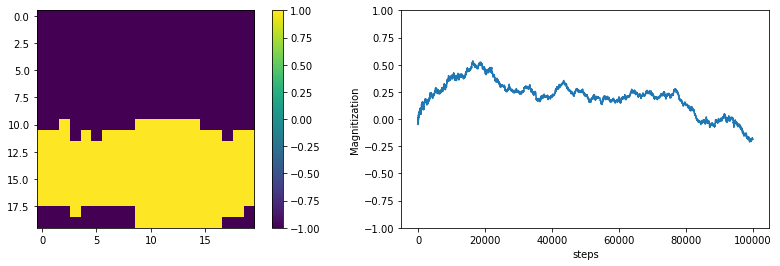

In [4]:

kb = 1
N = 20 
T = 1

lattice = np.zeros((N, N)) #needed for intial set up
lower = 0
upper = N - 1

for i in range(N):
    for j in range(N):
        if random.random() < 0.5:
            lattice[i, j] = 1
        else:
            lattice[i, j] = -1

M = np.zeros((100000))
snapshot = []

for i in range(100000): 
    lattice_old = lattice.copy() 
    snapshot.append(lattice_old.copy()) #adds on value if accepted
    M[i] = (1/(N**2))*sum(sum(lattice))
    x = random.randint(0, 19)
    y = random.randint(0, 19)
    lattice[x, y] = -lattice[x, y]
    
    if energy(lattice) > energy(lattice_old) and random.random()>=np.exp(-(energy(lattice)-energy(lattice_old))/(kb*T)):
        lattice[x, y]=-lattice[x,y]

    
plt.subplots_adjust(right = 2)
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.imshow(lattice)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.plot(M)
plt.ylabel("Magnitization")
plt.xlabel("steps")
plt.ylim(-1, 1)
plt.show()

figure,((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

def animate(frame):
    ax1.clear()
    ax2.clear()
    ax1.imshow(snapshot[frame*1000])
    ax2.plot(M[0:frame*1000])
    ax2.set_ylabel("Magnitization")
    ax2.set_xlabel("Iterations")
    ax2.set_ylim(-1, 1)
    ax2.set_xlim(0, 100000)

anim = FuncAnimation(figure, animate, frames = 100, interval = 100)
video = anim.to_html5_video()
plt.close()
display.HTML(video)



From this graph and resulting animation, we can see the magnitization for a completely random run through all the Monte Carlo steps. 

Now we can see if this code is going to work for different input values. This is going to really see if the code is sturdy and bug-free. T = 3 is going to be used. Because there is a rising temperature, we would expect there to be a much higher energy. If the code was written properly, the graph of magnetization should show this. 

In [5]:
N = 20
T = 3
kb = 1
lattice = np.zeros((N, N))
lower = 0
upper = N - 1

for i in range(N):
    for j in range(N):
        if random.random() < 0.5:
            lattice[i,j] = 1
        else:
            lattice[i,j] = -1

M = np.zeros((100000))
snapshot = []

for i in range(100000):
    lattice_old = lattice.copy()
    snapshot.append(lattice_old.copy())
    M[i] = (1/(N**2))*sum(sum(lattice))
    x = random.randint(0, 19)
    y = random.randint(0, 19)
    lattice[x, y] =-lattice[x, y]
    
    if energy(lattice)>energy(lattice_old) and random.random()>=np.exp(-(energy(lattice)-energy(lattice_old))/(kb*T)):
        lattice[x,y]=-lattice[x,y]

figure,((ax1, ax2)) = plt.subplots(nrows = 1,ncols = 2,figsize = (10, 4))

def animate(frame):
    ax1.clear()
    ax2.clear()
    ax1.imshow(snapshot[frame*1000])
    ax2.plot(M[0:frame*1000])
    ax2.set_ylabel("Magnitization")
    ax2.set_xlabel("Iterations")
    ax2.set_ylim(-1, 1)
    ax2.set_xlim(0, 100000)

anim = FuncAnimation(figure, animate, frames = 100, interval = 100)
video = anim.to_html5_video()
plt.close()
display.HTML(video)



Based on the observations seen from the plots and the resulting animation, it is clear that there is a distinct relationship between the temperature and the alignment. As T grows larger and larger, the dipoles find it harder and harder to align themselves. Physically, this makes sense on a quantum scale. When T is small, therefore, the alignment becomes easier for the dipoles.

# To Summarize:

A Monte Carlo Simulation was used to calculate the energy of a certain lattice format of dipoles with polar value spins. A real-time magnetization graph along with the lattice simulation was plotted at the end for certain values of temperature and from, the analysis of the alignment of dipoles was made exponentially easier than it would have been without the code for it.